CSCI218 Assignment

Done by : PT07

Kimberly Mun (8761711)

Irene Phang (8865176)

Chua Fu De (9533801)

Basil Hia (9890087)

Ivan Wee (9182639)

Mah Zi Xin (9880549)



# 1. Importing required libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix


# 2. Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Define file path
BASE_PATH = "/content/drive/MyDrive/DryBeanDataset/Dry_Bean_Dataset.xlsx"

#Load the dataset
df = pd.read_excel(BASE_PATH)

#Check if it is loaded
df.head()

Mounted at /content/drive


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# 3. Exploratory data analysis

In [ ]:
# quick summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
# counts of types of data/ class distribution
df.dtypes.value_counts()

,count
float64,14
int64,2
object,1


Results:
*   13,611 rows and 17 columns
*   16 numerical data types, and categorical class column
* target column is 'Class', indicating the bean type
* 'non-null' for all columns indicate that there are no missing values in the dataset, so no imputation is required




In [ ]:
# statistics for every numerical column
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Results:
* significant variation in scale of features (area has mean of 53048 with maximum value of 254616, while perimeter's values are in the hundreds)
* features like shapefactor are in decimals
* thus, feature scaling will be necessary in pre-processing.
* some features also show large gaps between minimum and maximum values, like area and majoraxislength. this suggests possibility of right-skewed distributions, which we will check using histograms

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()  # Count of null values in each column

# Check which columns have missing values
print("Columns with missing values: ")
print(missing_values[missing_values > 0])

Columns with missing values: 
Series([], dtype: int64)


Results: No column with missing values

In [ ]:
# checking the distribution of data (important for multi-classification problem)
df.Class.value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


<Axes: xlabel='count', ylabel='Class'>

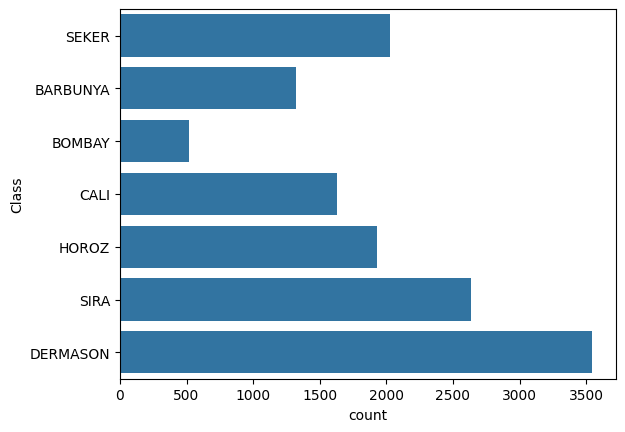

In [ ]:
# visualising class distribution
sns.countplot(df.Class)

*   The class distribution is uneven and the dataset is imbalanced.
*   DERMASON is the most represented class with 3546 samples, while BOMBAY is the least represented with only 522 samples
* The difference between majority and minority classes is significant (almost 7 times)


<Axes: >

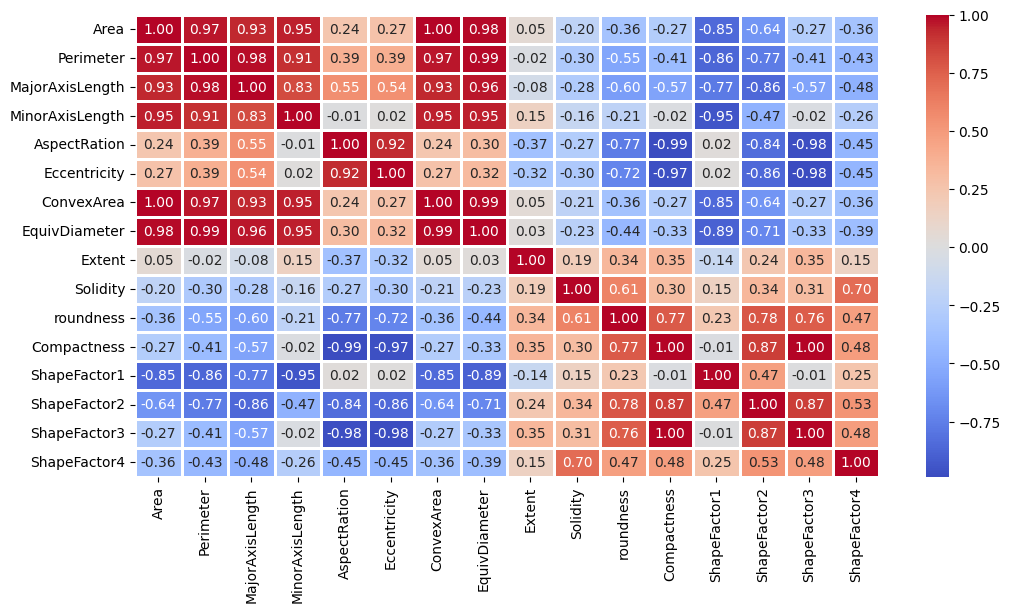

In [ ]:
# Display heatmap that plots correlation matrix between the numerical attributes

numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(),
            cmap = 'coolwarm',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

Results:
* some highly correlated features, like Area & ConvexArea, Area & EquivDiameter, Perimeter & Area, Area & MajorAxisLength, Area & MinorAxisLength etc.
* These suggests that these features all measure similar geometric properties of the beans, and may be removed later in pre-processing (redundancy).
* Even features like AspectRatio & Eccentricity have a very strong positive correlation of 0.92, because both measure the elongation of the bean
* Similarly, some features exhibit strong negative relationships (e.g. Compactness vs AspectRatio)
* Presence of many highly correlated features indicates multicollinearity. Techniques to reduce dimensionality, such as principal component analysis, can help to reduce redundancy here. This is important as some models are more affected by multicollinearity, such as the lienar models (logistic regression) and distance-based models.


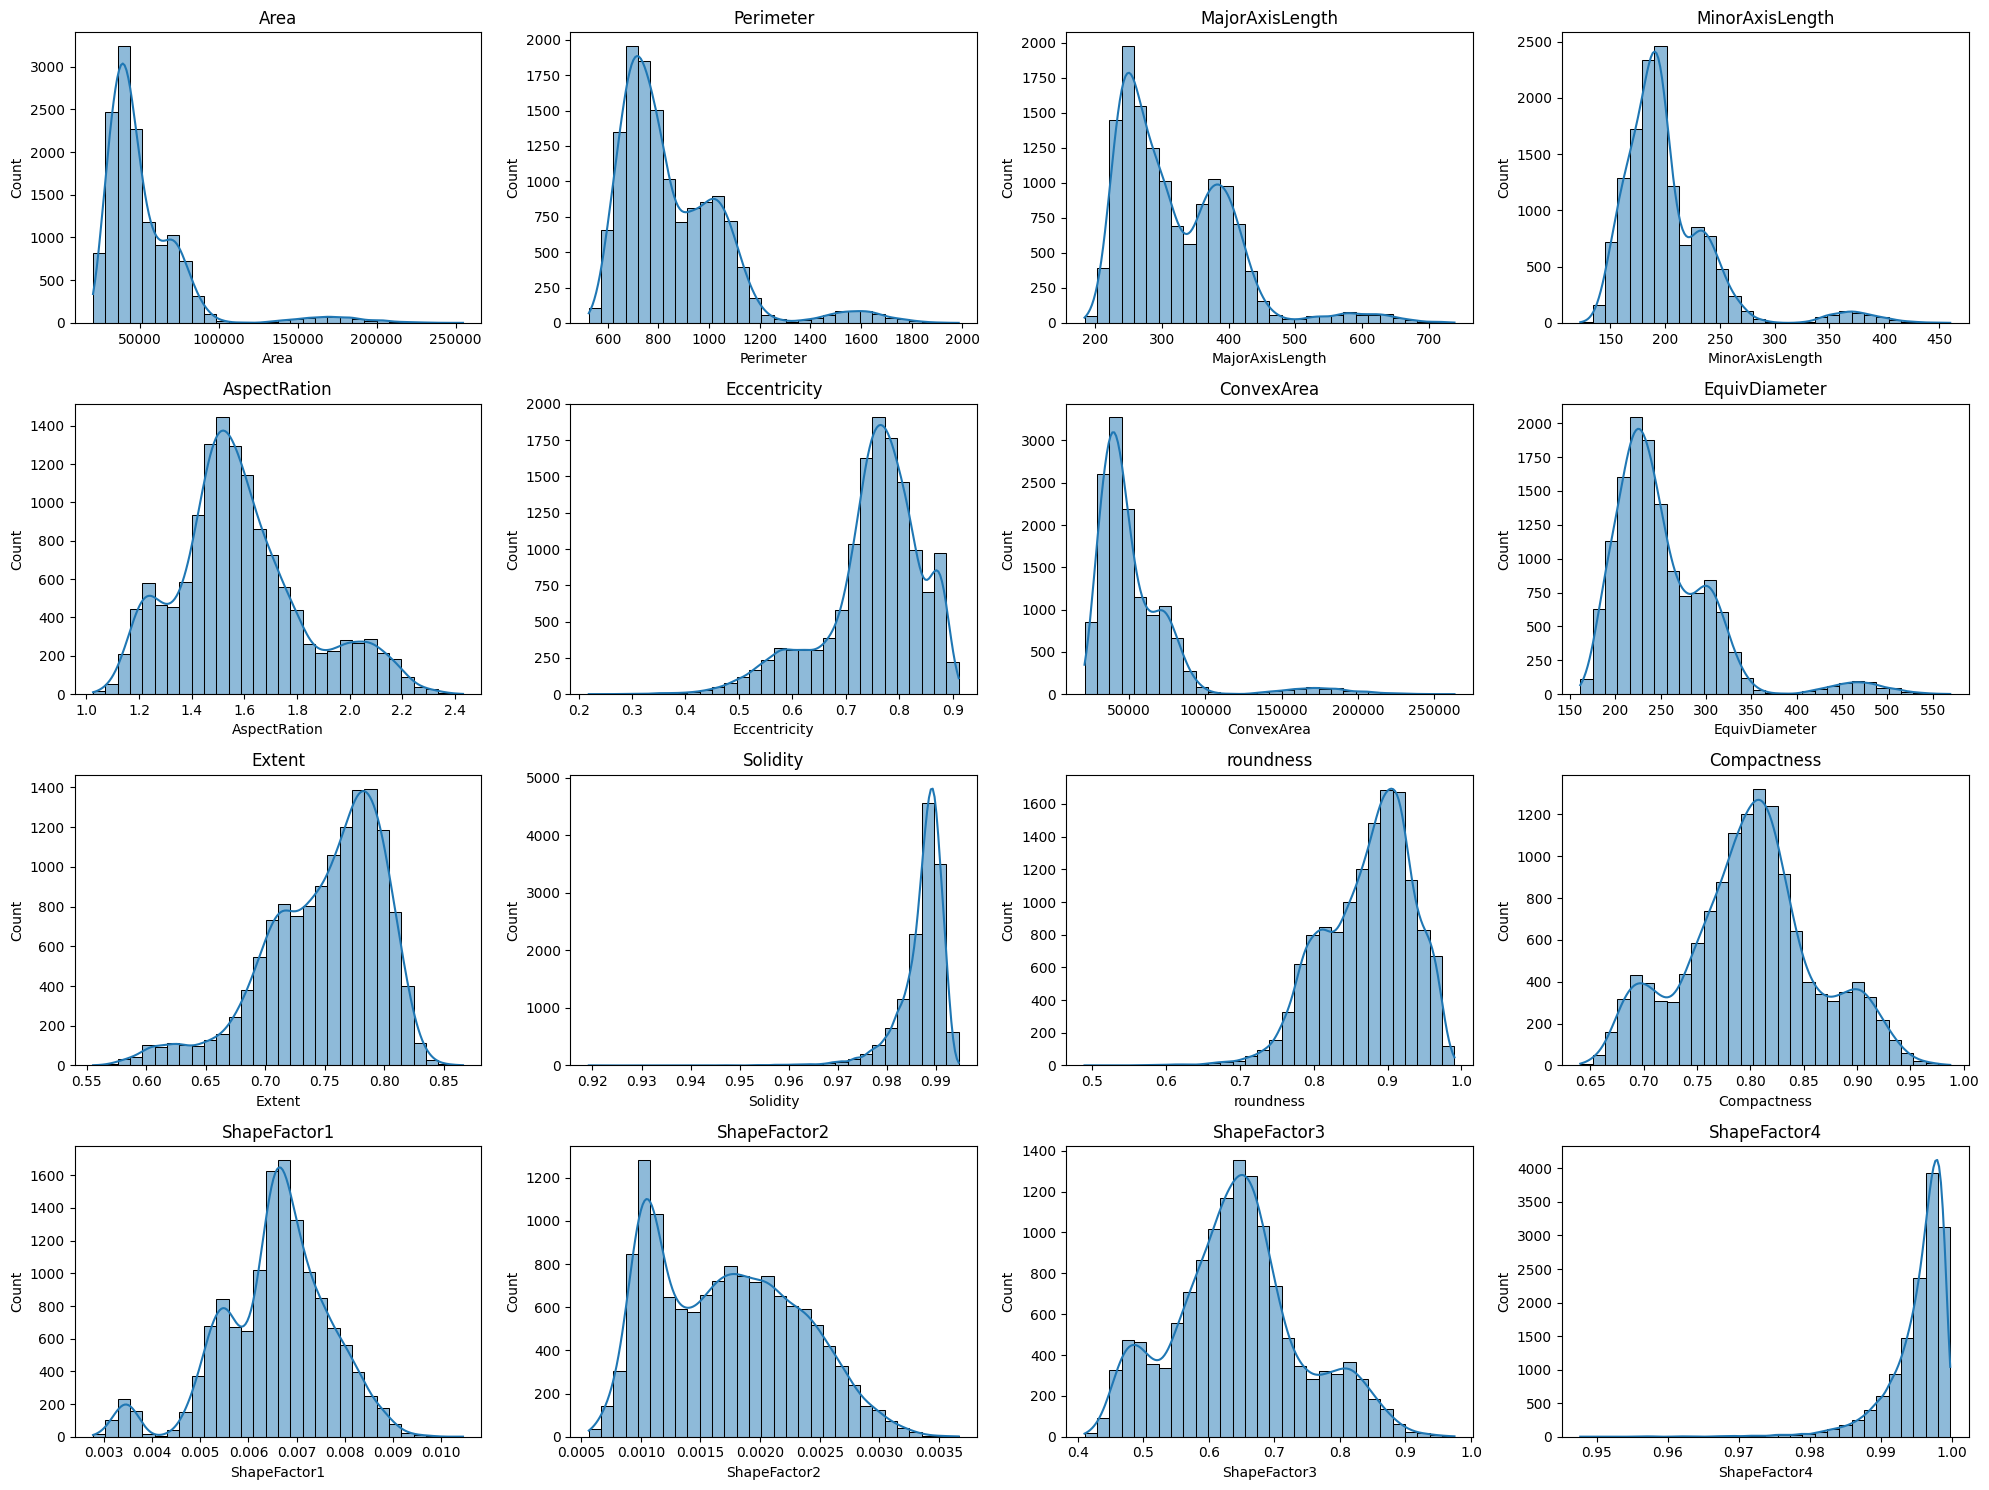

In [ ]:
# histogram of key features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Results:
* Size-related features (like Area, Perimeter) are right-skewed distributions. This suggests most beans are small to medium sized, with only a few beans significantly larger.
* Features like Solidarity show very tight distributions with low variance. This could suggest most beans have similar solidarity (i.e. convexity) characteristics, so this feature might have less predictive/ discriminative power.
* No significant presence of outliers

# 4. Pre-processing

In [ ]:
# oversampling [DO THIS ONLY IF MINORITY CLASS RECALL/ F1-SCORE IS BAD]

In [ ]:
# Preparing data by splitting into training and testing sets using stratified sampling
X = df.drop(columns=["Class"]) # features
y = df["Class"] # class

# encode labels (categorical -> numbers). for use in mlp
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# using 20% for testing, and random seed 42 for reproducability
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# .split() generates indices / row numbers
for train_index, test_index in split.split(X, y_encoded):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y_encoded[train_index]
    y_test = y_encoded[test_index]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10888, 16)
X_test shape: (2723, 16)
y_train shape: (10888,)
y_test shape: (2723,)


In [ ]:
# check which numbers map to which class
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'BARBUNYA': np.int64(0), 'BOMBAY': np.int64(1), 'CALI': np.int64(2), 'DERMASON': np.int64(3), 'HOROZ': np.int64(4), 'SEKER': np.int64(5), 'SIRA': np.int64(6)}


In [ ]:
# check if stratified sampling worked
print("Original distribution:\n", y.value_counts(normalize=True))

# decode back to strings
y_train_labels = pd.Series(le.inverse_transform(y_train))
y_test_labels  = pd.Series(le.inverse_transform(y_test))

print("\nTrain distribution:\n", y_train_labels.value_counts(normalize=True))
print("\nTest distribution:\n", y_test_labels.value_counts(normalize=True))

Original distribution:
 Class
DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: proportion, dtype: float64

Train distribution:
 DERMASON    0.260562
SIRA        0.193699
SEKER       0.148880
HOROZ       0.141624
CALI        0.119765
BARBUNYA    0.097079
BOMBAY      0.038391
Name: proportion, dtype: float64

Test distribution:
 DERMASON    0.260375
SIRA        0.193537
SEKER       0.149100
HOROZ       0.141755
CALI        0.119721
BARBUNYA    0.097319
BOMBAY      0.038193
Name: proportion, dtype: float64


Feature Engineering function + transformer

In [ ]:
from sklearn.preprocessing import FunctionTransformer

# Feature Engineering:
# Create extra ratio/interaction features to help separate classes

def add_feature_engineering(X):
    """
    X: pandas DataFrame of features (no Class column)
    returns: DataFrame with new engineered columns added
    """
    X = X.copy()

    eps = 1e-9  # prevents division by zero

    # Common geometry ratios / compactness-style interactions
    if "Area" in X.columns and "Perimeter" in X.columns:
        X["Area_Perimeter_Ratio"] = X["Area"] / (X["Perimeter"] + eps)
        X["Perimeter2_Area"] = (X["Perimeter"] ** 2) / (X["Area"] + eps)

    if "MajorAxisLength" in X.columns and "MinorAxisLength" in X.columns:
        X["Major_Minor_Ratio"] = X["MajorAxisLength"] / (X["MinorAxisLength"] + eps)

    # Interaction terms (multiply) to capture combined effects
    if "Eccentricity" in X.columns and "AspectRation" in X.columns:
        X["Ecc_x_Aspect"] = X["Eccentricity"] * X["AspectRation"]

    if "Roundness" in X.columns and "Compactness" in X.columns:
        X["Round_x_Compact"] = X["Roundness"] * X["Compactness"]

    if "Solidity" in X.columns and "Extent" in X.columns:
        X["Solidity_x_Extent"] = X["Solidity"] * X["Extent"]

    return X

# Wrap into sklearn transformer so it can be used in Pipeline
feateng = FunctionTransformer(add_feature_engineering, validate=False)

In [ ]:
# preprocessing pipeline

pre_pipeline = Pipeline([
    ("feateng", feateng),
    ("scaler", StandardScaler()), # feature scaling - normalisation using z-score, because features vary greatly in magnitutde
    ("pca", PCA(n_components=0.95, random_state =42)) # pca
])


* Principal Component Analysis (PCA) is used to reduce dimensionality and redundancy, due to the strong multicollinearity that was observed from the correlation matrix earlier.

* PCA keeps the minimum number of principal components to preserve 95% of the total variance in the data. This lets us retain most of the information while removing some redundant dimensions.

* Useful for KNN, logistic regression to reduce multicollinearity and dimensionality and to get 2D visualisation of separability

# 5. Models

In [ ]:
# build a pipeline with each model
def build_pipeline(model):
    return Pipeline([
        ('preprocessor', pre_pipeline), # preprocessing pipeline
        ('model', model)
    ])

log_reg = LogisticRegression(max_iter=5000)
log_pipeline = build_pipeline(log_reg)

knn = KNeighborsClassifier(n_neighbors=5) # default is minkowski with p=2 => euclidean distance
knn_pipeline = build_pipeline(knn)

rf_pipeline = Pipeline([
    ("feateng", feateng),
    ("scaler", StandardScaler()),  # PCA is not needed for random forest as trees handle correlated features well
    ("model", RandomForestClassifier(random_state=42))
])

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # 2 hidden layers
    activation="relu",
    solver="adam",
    alpha=1e-4,                   # L2 regularization
    learning_rate_init=1e-3,
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    random_state=42
)

mlp_pipeline = build_pipeline(mlp)

In [ ]:
# Train + evaluate pipelines
pipelines = {
    "Logistic Regression": log_pipeline,
    "KNN": knn_pipeline,
    "Random Forest": rf_pipeline,
    "MLP": mlp_pipeline
}

results_summary = {}
preds_store = {}   # store predictions for later

for name, pipe in pipelines.items():
    print(f"\n========== {name} ==========")

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    preds_store[name] = y_pred

    # check predict_proba for models
    if hasattr(pipe, "predict_proba"):
        y_prob = pipe.predict_proba(X_test)
        avg_conf = float(np.mean(np.max(y_prob, axis=1)))
    else:
        avg_conf = np.nan

    acc = float(accuracy_score(y_test, y_pred))
    f1_macro = float(f1_score(y_test, y_pred, average="macro"))
    prec_macro = float(precision_score(y_test, y_pred, average="macro", zero_division=0))
    rec_macro = float(recall_score(y_test, y_pred, average="macro", zero_division=0))

    print("Accuracy:", round(acc, 4))
    print("Macro F1:", round(f1_macro, 4))
    print("Avg prediction confidence:", round(avg_conf, 4) if not np.isnan(avg_conf) else "N/A")
    print("\nClassification report:\n", classification_report(y_test, y_pred))

    results_summary[name] = {
        "Accuracy": acc,
        "Macro_F1": f1_macro,
        "Macro_Precision": prec_macro,
        "Macro_Recall": rec_macro,
        "Avg_Confidence": avg_conf
    }



========== Logistic Regression ==========
Accuracy: 0.9188
Macro F1: 0.9314
Avg prediction confidence: 0.9158

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       265
           1       1.00      1.00      1.00       104
           2       0.92      0.94      0.93       326
           3       0.92      0.90      0.91       709
           4       0.96      0.95      0.95       386
           5       0.93      0.96      0.94       406
           6       0.85      0.87      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723


========== KNN ==========
Accuracy: 0.9163
Macro F1: 0.9276
Avg prediction confidence: 0.9352

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       265
           1       1.00      1.00     

In [ ]:
# cross-validation setup (on train set only)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "f1_macro": "f1_macro", # important for multi-class
    "precision_macro": "precision_macro",
    "recall_macro": "recall_macro"
}

cv_rows = []

for name, pipe in pipelines.items():
    scores = cross_validate(
        pipe,
        X_train, y_train,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False
    )

    cv_rows.append({
        "Model": name,
        "CV_Acc_Mean": np.mean(scores["test_acc"]),
        "CV_Acc_Std": np.std(scores["test_acc"]),
        "CV_F1Macro_Mean": np.mean(scores["test_f1_macro"]),
        "CV_F1Macro_Std": np.std(scores["test_f1_macro"]),
        "CV_PrecMacro_Mean": np.mean(scores["test_precision_macro"]),
        "CV_RecMacro_Mean": np.mean(scores["test_recall_macro"]),
    })

cv_df = pd.DataFrame(cv_rows).sort_values("CV_F1Macro_Mean", ascending=False)
cv_df


,Model,CV_Acc_Mean,CV_Acc_Std,CV_F1Macro_Mean,CV_F1Macro_Std,CV_PrecMacro_Mean,CV_RecMacro_Mean
3,MLP,0.928269,0.004173,0.939553,0.003393,0.941022,0.938616
0,Logistic Regression,0.922942,0.004296,0.934773,0.004626,0.936110,0.933836
2,Random Forest,0.922850,0.004720,0.934088,0.003815,0.935428,0.933077
1,KNN,0.921289,0.003983,0.933267,0.004183,0.935390,0.931616


In [ ]:
from sklearn.model_selection import GridSearchCV

refit_metric = "f1_macro" # primary metric for tuning - balanced multi-class performance

param_grids = {
    "Logistic Regression": {
        "model__C": [0.01, 0.1, 1, 10], # regularisation strength
        "preprocessor__pca__n_components": [0.90, 0.95, 0.99],  # tune PCA variance retention
    },
    "KNN": {
        "model__n_neighbors": [3, 5, 7, 9, 11], # no. of neighbours
        "model__weights": ["uniform", "distance"], # weighting scheme
        "model__metric": ["minkowski"],
        "model__p": [1, 2],  # 1=Manhattan, 2=Euclidean
        "preprocessor__pca__n_components": [0.90, 0.95, 0.99], # tune PCA variance retention
    },
    "Random Forest": {
        "model__n_estimators": [200, 400],  # no. of trees
        "model__max_depth": [None, 10, 20], # maximum depth of trees
        "model__min_samples_split": [2, 5], # min samples to split
        "model__min_samples_leaf": [1, 2],  # min samples at leaf
        "model__max_features": ["sqrt", "log2"],
    },
    "MLP": {
        "model__hidden_layer_sizes": [(64, 32), (128, 64), (128, 64, 32)],
        "model__alpha": [1e-5, 1e-4, 1e-3],  # L2 regularisation term
        "model__learning_rate_init": [1e-4, 1e-3], # learning rate
        "preprocessor__pca__n_components": [0.90, 0.95, 0.99],
    }
}

best_models = {}
tuning_rows = []

for name, pipe in pipelines.items():
    print(f"\nTuning: {name}")

    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        scoring=scoring,
        refit=refit_metric,       # picks best using f1_macro
        cv=cv,          # using the same 5-fold stratified k fold earlier
        n_jobs=-1,
        verbose=0
    )

    gs.fit(X_train, y_train) # fit only on training data (prevents data leakage)

    best_models[name] = gs.best_estimator_
    tuning_rows.append({
        "Model": name,
        "Best_CV_F1Macro": gs.best_score_,
        "Best_Params": gs.best_params_
    })

tuning_df = pd.DataFrame(tuning_rows).sort_values("Best_CV_F1Macro", ascending=False)
tuning_df



Tuning: Logistic Regression

Tuning: KNN

Tuning: Random Forest

Tuning: MLP


,Model,Best_CV_F1Macro,Best_Params
3,MLP,0.942461,"{'model__alpha': 0.0001, 'model__hidden_layer_..."
1,KNN,0.937793,"{'model__metric': 'minkowski', 'model__n_neigh..."
0,Logistic Regression,0.936826,"{'model__C': 10, 'preprocessor__pca__n_compone..."
2,Random Forest,0.935062,"{'model__max_depth': None, 'model__max_feature..."


In [ ]:
meta = tuning_df.set_index("Model")[["Best_CV_F1Macro", "Best_Params"]].to_dict(orient="index")

test_rows = []
preds_store = {}

for name, best_pipe in best_models.items():
    print(f"\n{name} (TUNED) ---------------------------")

    print("Best hyperparameters:", meta[name]["Best_Params"])
    print("Best CV F1 (macro):", round(float(meta[name]["Best_CV_F1Macro"]), 6))

    # predict on test set
    y_pred = best_pipe.predict(X_test)
    preds_store[name] = y_pred

    # confidence
    if hasattr(best_pipe, "predict_proba"):
        y_prob = best_pipe.predict_proba(X_test)
        avg_conf = float(np.mean(np.max(y_prob, axis=1)))
    else:
        avg_conf = np.nan

    # metrics
    acc = float(accuracy_score(y_test, y_pred))
    f1_macro = float(f1_score(y_test, y_pred, average="macro"))
    prec_macro = float(precision_score(y_test, y_pred, average="macro", zero_division=0))
    rec_macro = float(recall_score(y_test, y_pred, average="macro", zero_division=0))

    print("Test Accuracy:", round(acc, 4))
    print("Test Macro F1:", round(f1_macro, 4))
    print("Avg prediction confidence:", round(avg_conf, 4) if not np.isnan(avg_conf) else "N/A")

    print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

    test_rows.append({
        "Model": name,
        "CV_Macro_F1": float(meta[name]["Best_CV_F1Macro"]),
        "Test_Accuracy": acc,
        "Test_Macro_F1": f1_macro,
        "Test_Macro_Precision": prec_macro,
        "Test_Macro_Recall": rec_macro,
        "Test_Avg_Confidence": avg_conf
    })

# summary table
test_df = pd.DataFrame(test_rows).sort_values("Test_Macro_F1", ascending=False).round(4)
test_df


Logistic Regression (TUNED) ---------------------------
Best hyperparameters: {'model__C': 10, 'preprocessor__pca__n_components': 0.99}
Best CV F1 (macro): 0.936826
Test Accuracy: 0.9196
Test Macro F1: 0.932
Avg prediction confidence: 0.9219

Classification report:
               precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.94      0.94       326
    DERMASON       0.92      0.91      0.91       709
       HOROZ       0.97      0.94      0.95       386
       SEKER       0.93      0.96      0.94       406
        SIRA       0.84      0.88      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723


KNN (TUNED) ---------------------------
Best hyperparameters: {'model__metric': 'minkowski', 'model__n_neighbors': 9, 'model__p': 1, '

,Model,CV_Macro_F1,Test_Accuracy,Test_Macro_F1,Test_Macro_Precision,Test_Macro_Recall,Test_Avg_Confidence
3,MLP,0.9425,0.9258,0.9375,0.9385,0.9368,0.9401
0,Logistic Regression,0.9368,0.9196,0.9320,0.9343,0.9303,0.9219
2,Random Forest,0.9351,0.9177,0.9299,0.9313,0.9288,0.9183
1,KNN,0.9378,0.9141,0.9276,0.9308,0.9251,0.9294


*   Macro Precision, Recall, and F1 scores are closely aligned, indicating balanced performance across all classes.
*   The MLP model achieved the highest performance across all evaluation metrics, including Accuracy and Macro-F1.
*   Logistic Regression, Random Forest, and KNN showed similar but slightly lower performance.
*   The strong performance of MLP suggests that nonlinear models are more suitable for this dataset.


In [ ]:
# check PCA stats
pca = log_pipeline.named_steps["preprocessor"].named_steps["pca"]
print("Number of components kept:", pca.n_components_)

# explained variance per component
print("Explained variance ratio:\n", pca.explained_variance_ratio_)
print("\nCumulative variance:\n", np.cumsum(pca.explained_variance_ratio_))
print("\nTotal variance retained:", np.sum(pca.explained_variance_ratio_))


Number of components kept: 5
Explained variance ratio:
 [0.53409402 0.27364135 0.07787085 0.06329572 0.03113472]

Cumulative variance:
 [0.53409402 0.80773537 0.88560622 0.94890194 0.98003666]

Total variance retained: 0.9800366577637564


In [ ]:
pca = log_pipeline.named_steps["preprocessor"].named_steps["pca"]

print("PCA expects features:", pca.n_features_in_)     # should be 21
print("X_train columns:", X_train.shape[1])           # 16
print("len(X_train.columns):", len(X_train.columns))  # 16

PCA expects features: 21
X_train columns: 16
len(X_train.columns): 16


In [ ]:
import numpy as np
import pandas as pd

# Grab pipeline parts
pre = log_pipeline.named_steps["preprocessor"]   # Pipeline( feateng -> ... -> pca )
pca = pre.named_steps["pca"]

# original names (16)
orig_names = list(X_train.columns)

# Identify the custom feature engineering step
feateng = pre.named_steps["feateng"]

# Transform X_train through feateng to see output dimension
X_feat = feateng.transform(X_train)

# Convert to array safely (in case it returns DataFrame already)
if isinstance(X_feat, pd.DataFrame):
    n_out = X_feat.shape[1]
else:
    X_feat = np.asarray(X_feat)
    n_out = X_feat.shape[1]

print("Original features:", len(orig_names))
print("After feateng:", n_out)
print("PCA expects:", pca.n_features_in_)

# Build best-possible feature names
if n_out >= len(orig_names):
    extra = n_out - len(orig_names)
    extra_names = [f"engineered_{i+1}" for i in range(extra)]
    feature_names = orig_names + extra_names
else:
    # feateng reduced columns
    feature_names = [f"feat_{i}" for i in range(n_out)]

# Sanity check to match PCA input
if len(feature_names) != pca.n_features_in_:
    # fallback generic names if mismatch
    feature_names = [f"feat_{i}" for i in range(pca.n_features_in_)]

print("Final feature_names length:", len(feature_names))

# Loading matrix
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=feature_names
)

# Print top contributors (show ABS + signed loading)
# Find most important features inside each PCA component
TOP_K = 5
for i in range(pca.n_components_):
    pc = f"PC{i+1}"
    top_idx = loadings[pc].abs().sort_values(ascending=False).head(TOP_K).index

    print(f"\nTop {TOP_K} contributors for {pc}:")
    out = pd.DataFrame({
        "abs_loading": loadings.loc[top_idx, pc].abs(),
        "signed_loading": loadings.loc[top_idx, pc]
    }).sort_values("abs_loading", ascending=False)

    print(out)

Original features: 16
After feateng: 21
PCA expects: 21
Final feature_names length: 21

Top 5 contributors for PC1:
                 abs_loading  signed_loading
ShapeFactor2        0.288923        0.288923
MajorAxisLength     0.275684       -0.275684
Perimeter           0.254698       -0.254698
Compactness         0.243105        0.243105
ShapeFactor3        0.243069        0.243069

Top 5 contributors for PC2:
                 abs_loading  signed_loading
MinorAxisLength     0.338439        0.338439
ShapeFactor1        0.324129       -0.324129
engineered_1        0.284815        0.284815
Area                0.267509        0.267509
ConvexArea          0.266623        0.266623

Top 5 contributors for PC3:
              abs_loading  signed_loading
engineered_5     0.568855        0.568855
Extent           0.552082        0.552082
Solidity         0.365061        0.365061
ShapeFactor4     0.175838        0.175838
Eccentricity     0.175505        0.175505

Top 5 contributors for PC4:
     



*   Feature engineering increased the number of features from 16 to 21 before applying PCA.
*   PCA was used to reduce these features into 5 principal components for dimensionality reduction.
*   A loading matrix was created to identify the most important features for each principal component.
*   Features with high absolute loading values contributed most to the variation in the data.
*   This process improved model efficiency, reduced overfitting, and enhanced prediction performance.



# 6. Evaluation and Analysis

PCA Variance Explained

In [ ]:
# PCA variance explained
explained_var = pca.explained_variance_ratio_
cum_explained = explained_var.cumsum()

print("Explained variance ratio (first 10 PCs):")
for i, v in enumerate(explained_var[:10], start=1):
    print(f"PC{i}: {v:.4f}")

print(f"\nCumulative variance (first 10 PCs): {cum_explained[:10]}")
print(f"Total PCA components: {pca.n_components_}")
print(f"Total cumulative explained variance: {cum_explained[-1]:.4f}")


Explained variance ratio (first 10 PCs):
PC1: 0.5341
PC2: 0.2736
PC3: 0.0779
PC4: 0.0633
PC5: 0.0311

Cumulative variance (first 10 PCs): [0.53409402 0.80773537 0.88560622 0.94890194 0.98003666]
Total PCA components: 5
Total cumulative explained variance: 0.9800




*   PCA reduced the original and engineered features from 21 dimensions to 5 principal components.

*   The first principal component explains 53.41% of the total variance, indicating a dominant underlying pattern in the data.

*   The first two components capture 80.77% of the variance, showing that most information is concentrated in low-dimensional space.

*   Four components preserve approximately 95% of the total variance, demonstrating effective dimensionality reduction.

*   Retaining five components preserves 98% of the variance, improving model efficiency, stability, and generalisation while minimising information loss.



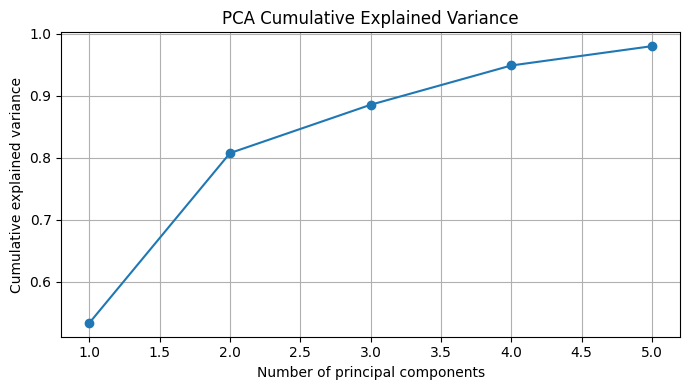

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(range(1, len(cum_explained)+1), cum_explained, marker="o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Cumulative Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.show()



*   The cumulative variance plot shows that 4 principal components retain
approximately 95% of the total variance (94.89%).
*   The first two components capture over 80% of the variance (80.77%), indicating that most information is concentrated early.
*   After the second component, the increase in explained variance becomes smaller, showing diminishing returns.
*   Adding the fifth component increases total explained variance to 98%, but with limited additional gain.

5 components were selected to balance accuracy and efficiency



Confusion Matrix for best model

Best tuned model: MLP


<Figure size 700x600 with 0 Axes>

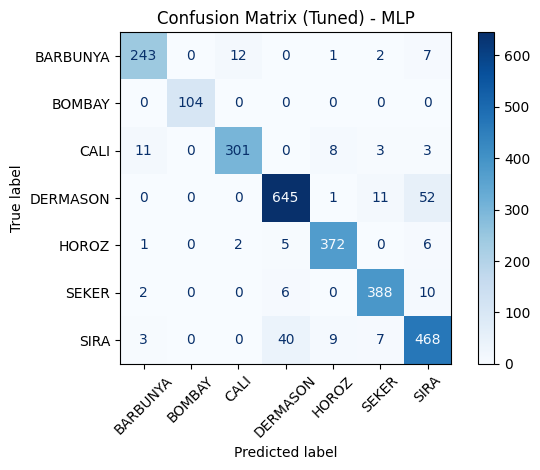

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Pick best tuned model by Test_Macro_F1
best_tuned_name = test_df.sort_values("Test_Macro_F1", ascending=False).iloc[0]["Model"]
best_tuned_pipe = best_models[best_tuned_name]

print("Best tuned model:", best_tuned_name)

# Predict using the best tuned pipeline
y_pred_best = best_tuned_pipe.predict(X_test)

plt.figure(figsize=(7,6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_best,
    display_labels=le.classes_,
    xticks_rotation=45,
    cmap="Blues"
)
plt.title(f"Confusion Matrix (Tuned) - {best_tuned_name}")
plt.tight_layout()
plt.show()



*   Most predictions lie along the diagonal, indicating that the MLP model achieves high overall classification accuracy across all bean classes.

*   The BOMBAY class is perfectly classified with no misclassifications, showing that it has highly distinctive features.

*   The main errors occur between DERMASON and SIRA, and between BARBUNYA and CALI, suggesting that these classes share similar size and shape characteristics that are difficult for the model to distinguish.



Looking into Misclassification in Best Model (RF)

Best tuned model: MLP


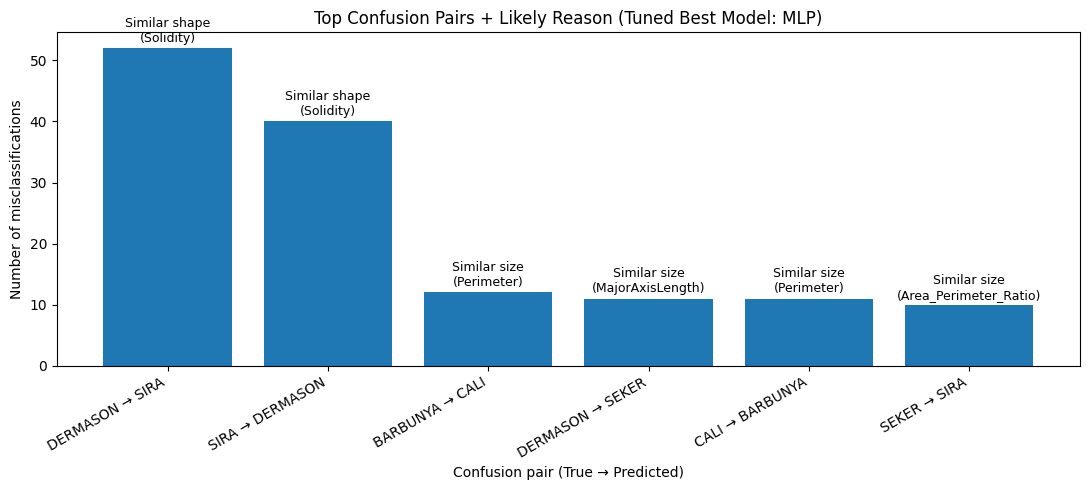

,True,Pred,Count,Reason,Pair
10,DERMASON,SIRA,52,Similar shape\n(Solidity),DERMASON → SIRA
19,SIRA,DERMASON,40,Similar shape\n(Solidity),SIRA → DERMASON
0,BARBUNYA,CALI,12,Similar size\n(Perimeter),BARBUNYA → CALI
9,DERMASON,SEKER,11,Similar size\n(MajorAxisLength),DERMASON → SEKER
4,CALI,BARBUNYA,11,Similar size\n(Perimeter),CALI → BARBUNYA
17,SEKER,SIRA,10,Similar size\n(Area_Perimeter_Ratio),SEKER → SIRA


In [ ]:
# Pick BEST tuned model from tuned results (test_df) and generate predictions on X_test

best_tuned_name = test_df.sort_values("Test_Macro_F1", ascending=False).iloc[0]["Model"]
best_tuned_pipe = best_models[best_tuned_name]

print("Best tuned model:", best_tuned_name)

y_pred_best = best_tuned_pipe.predict(X_test)

# If labels are encoded (numbers), convert back to class names using LabelEncoder
if np.issubdtype(np.array(y_test).dtype, np.number):
    y_test_names = le.inverse_transform(y_test)
    y_pred_names = le.inverse_transform(y_pred_best)
else:
    y_test_names = np.array(y_test)
    y_pred_names = np.array(y_pred_best)

# Ensure string labels
y_test_names = y_test_names.astype(str)
y_pred_names = y_pred_names.astype(str)



# Build X (features) and y (labels) from df, then APPLY the SAME feature engineering used in Pipeline


X_raw = df.drop(columns=["Class"]).copy()
y_all = df["Class"].astype(str).values

# Apply the SAME feature engineering function (must exist from Block 1)
X_fe = add_feature_engineering(X_raw)

# Standardise engineered features for fair difference comparison
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_fe), columns=X_fe.columns)



# Define feature groups (only keep columns that exist)

size_feats = ["Area", "Perimeter", "ConvexArea", "EquivDiameter",
              "MajorAxisLength", "MinorAxisLength",
              # include engineered size ratio features if they exist
              "Area_Perimeter_Ratio", "Perimeter2_Area", "Major_Minor_Ratio"]

shape_feats = ["AspectRation", "Eccentricity", "roundness", "Compactness",
               "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4",
               "Solidity", "Extent",
               # include engineered interaction features if they exist
               "Ecc_x_Aspect", "Round_x_Compact", "Solidity_x_Extent"]

size_feats  = [c for c in size_feats if c in X_scaled.columns]
shape_feats = [c for c in shape_feats if c in X_scaled.columns]



# Confusion matrix + extract top confusion pairs

labels = np.unique(y_test_names)
cm = confusion_matrix(y_test_names, y_pred_names, labels=labels)

pairs = []
for i, true_c in enumerate(labels):
    for j, pred_c in enumerate(labels):
        if i != j and cm[i, j] > 0:
            pairs.append((true_c, pred_c, cm[i, j]))

pairs_df = pd.DataFrame(pairs, columns=["True", "Pred", "Count"]).sort_values("Count", ascending=False)

top_k = 6
top_pairs = pairs_df.head(top_k).copy()


# Reason function: explain confusion using mean feature overlap

def reason_for_pair(true_cls, pred_cls):
    A = X_scaled.loc[y_all == true_cls]
    B = X_scaled.loc[y_all == pred_cls]

    # if class not found, return generic reason
    if len(A) == 0 or len(B) == 0:
        return "Feature overlap"

    size_diff = (A[size_feats].mean() - B[size_feats].mean()).abs()
    shape_diff = (A[shape_feats].mean() - B[shape_feats].mean()).abs()

    # If all NaN or empty feature groups
    if size_diff.isna().all() or shape_diff.isna().all():
        return "Feature overlap"

    top_size = size_diff.dropna().idxmin()
    top_shape = shape_diff.dropna().idxmin()

    size_val = float(size_diff.dropna().min())
    shape_val = float(shape_diff.dropna().min())

    # Decide which similarity dominates
    if size_val < shape_val * 0.7:
        return f"Similar size\n({top_size})"
    elif shape_val < size_val * 0.7:
        return f"Similar shape\n({top_shape})"
    else:
        return f"Overlap:\n{top_size}, {top_shape}"


# Add reason + label formatting
top_pairs["Reason"] = top_pairs.apply(lambda r: reason_for_pair(r["True"], r["Pred"]), axis=1)
top_pairs["Pair"] = top_pairs.apply(lambda r: f"{r['True']} → {r['Pred']}", axis=1)


# Plot bar chart of top confusion pairs + reason labels

plt.figure(figsize=(11, 5))
bars = plt.bar(top_pairs["Pair"], top_pairs["Count"])
plt.title(f"Top Confusion Pairs + Likely Reason (Tuned Best Model: {best_tuned_name})")
plt.xlabel("Confusion pair (True → Predicted)")
plt.ylabel("Number of misclassifications")
plt.xticks(rotation=30, ha="right")

for bar, reason in zip(bars, top_pairs["Reason"]):
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.5, reason,
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

# Show table
top_pairs

Results:

*   The largest confusion occurs between SIRA and DERMASON, with 52 and 40 samples misclassified due to similar shape characteristics (solidity).

*   BARBUNYA and CALI are frequently confused because of similar perimeter and size-related features.

*   DERMASON and SEKER misclassifications are mainly caused by similarities in major axis length.

*   SEKER and SIRA are sometimes confused due to similar area–perimeter ratios.

Overall, misclassifications mainly occur between morphologically similar bean varieties, indicating limitations in separating subtle shape differences.